In [8]:
import pandas as pd
import numpy as np


In [59]:
x=pd.read_excel("/content/output.xlsx")

In [60]:
print(x)

        _unit_id  ...  which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold_reason
0      694550568  ...                       He is smiling. => happy, joy                             
1      694550569  ...                   A beautiful scenery. => serenity                             
2      694550570  ...                They look serious. => sadness, fear                             
3      694550571  ...                        A cute puppy. => happy, joy                             
4      694550572  ...                  She looks fun. => fun, joy, happy                             
...          ...  ...                                                ...                             
12592  694566359  ...                                                NaN                             
12593  694566362  ...                                                NaN                             
12594  694566363  ...                                                NaN          

In [61]:
x.head()


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,which_of_these_sentiment_scores_does_the_above_image_fit_into_best,which_of_these_sentiment_scores_does_the_above_image_fit_into_best:confidence,imageurl,which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold,which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold_reason
0,694550568,True,golden,47,NaN,Positive,0.6395,http://farm1.staticflickr.com/20/71235476_3103...,Highly positive\nPositive,"He is smiling. => happy, joy"
1,694550569,True,golden,36,NaN,Positive,0.6458,http://farm4.staticflickr.com/3096/2584485524_...,Highly positive\nPositive,A beautiful scenery. => serenity
2,694550570,True,golden,35,NaN,Negative,0.8420,http://farm3.staticflickr.com/2880/11733997835...,Negative\nHighly negative,"They look serious. => sadness, fear"
3,694550571,True,golden,41,NaN,Positive,0.7216,http://farm4.staticflickr.com/3022/2286937150_...,Highly positive\nPositive,"A cute puppy. => happy, joy"
4,694550572,True,golden,46,NaN,Positive,0.8801,http://farm1.staticflickr.com/163/357381033_d0...,Highly positive\nPositive,"She looks fun. => fun, joy, happy"


In [62]:
SentimenScores=x["which_of_these_sentiment_scores_does_the_above_image_fit_into_best:confidence"]
Sentiments=x["which_of_these_sentiment_scores_does_the_above_image_fit_into_best"]
imageUrl=x["imageurl"]
SentimentGold=x["which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold"]

In [13]:
import urllib.request

k=0
url=[]
for i in range(len(imageUrl)):
  url.append("/content/Untitled Folder/"+str(i)+".jpg")
  urllib.request.urlretrieve(imageUrl[i], "/content/Untitled Folder/"+str(i)+".jpg")



In [63]:
X=url
Y=Sentiments

In [64]:
Y[Y=="Highly positive"]=int(4)
Y[Y=="Positive"]=int(3)
Y[Y=="Neutral"]=int(2)
Y[Y=="Negative"]=int(1)
Y[Y=="Highly negative"]=int(0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [65]:
Y

0        3
1        3
2        1
3        3
4        3
        ..
12592    3
12593    3
12594    3
12595    3
12596    3
Name: which_of_these_sentiment_scores_does_the_above_image_fit_into_best, Length: 12597, dtype: object

In [66]:
Y=pd.to_numeric(Y, errors='coerce').fillna(0, downcast='infer')


In [67]:


X_new=[]
Y_new=[]
j=0
k=0
m=0
for i in range(len(X)):
  if(Y[i]==3):
    j=j+1
  if(Y[i]==2):
    k=k+1
  if(Y[i]==1):
    m=m+1
  if(j<350 and Y[i]==3):
    Y_new.append(Y[i])
    X_new.append(X[i])
  elif(k<350 and Y[i]==2):
    Y_new.append(Y[i])
    X_new.append(X[i])
  elif(m<350 and Y[i]==1):
    Y_new.append(Y[i])
    X_new.append(X[i])
  elif(Y[i]==4 or Y[i]==0):
    Y_new.append(Y[i])
    X_new.append(X[i])

In [86]:
X=X_new
Y=Y_new

In [87]:
Y=np.array(Y)

(array([256.,   0., 349.,   0.,   0., 349.,   0., 349.,   0., 401.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

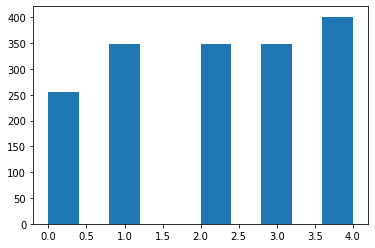

In [88]:
import matplotlib.pyplot as plt
plt.hist(Y)

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test2, Y_train, Y_test2 = train_test_split(X,Y)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test2,Y_test2)

In [90]:
from PIL import Image

import torchvision.transforms as transforms

#--- Transformamos los datos para adaptarlos a la entrada de ResNet 224x224 px
data_transform = transforms.Compose([
                 transforms.Resize((224, 224)),
                 transforms.Grayscale(3), #Dado que MNIST tiene un solo canal, lo cambiamos a 3 para no tener que modificar más capas en el modelo
                 transforms.ToTensor(),
                 transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                 ])

In [91]:
 a=np.array(data_transform(Image.open(X_train[0])) )

In [92]:
Y_test[0]

3

In [93]:
X_trainArr=[]

for i in X_train:

  X_trainArr.append( np.array(data_transform(Image.open(i)) ))

In [94]:
X_testArr=[]
for i in X_test:
  Y
  X_testArr.append( np.array(data_transform(Image.open(i)) ))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


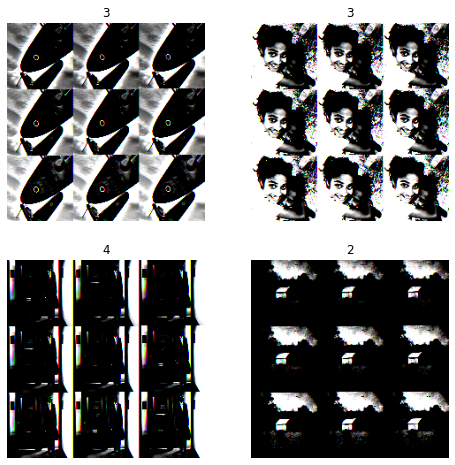

In [95]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(X_testArr[i*15].reshape(224,224,3))
  plt.title(str(Y_test[i*15]))
  plt.axis(False)
plt.show()

In [96]:
#Y_train=Y_train[:int(len(Y_train)*0.5)]
#Y_test=Y_test[:int(len(Y_test)*0.5)]
#Y_valid=Y_valid[:int(len(Y_valid)*0.5)]


In [97]:
len(Y_train)

1278

In [98]:
X_validArr=[]
for i in X_valid:
  X_validArr.append( np.array(data_transform(Image.open(i)) ))

In [99]:
#--- Convetimos las listas con los datos a tensores de torch
import torch
from torch.autograd import Variable

X_train = Variable(torch.from_numpy(np.array(X_trainArr))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train)).long())

X_test = Variable(torch.from_numpy(np.array(X_testArr))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([1278, 3, 224, 224])

In [100]:
len(X_train)

1278

In [101]:

batch_size = 32

train_ds = torch.utils.data.TensorDataset(X_train, Y_train)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True)
del train_ds

In [122]:
#--- Seleccionamos y cargamos el modelo Alexnet
import torchvision

model = torchvision.models.densenet121(pretrained=True)
model

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [103]:
model.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [123]:
#--- Congelamos los pesos en las capaz del modelo para que no se actualicen
for p in model.parameters():
    p.requires_grad = False

#--- Definimos el número de clases
out_dim = 5

#--- Reescribimos la nueva capa de salida con el nuevo dataset
#model.classifier[6] = torch.nn.Sequential(
#  torch.nn.Linear(model.classifier[6].in_features, 100),
#  torch.nn.ReLU(inplace=True),    
#  torch.nn.Linear(100, out_dim)
#)
model.classifier = torch.nn.Sequential(
  torch.nn.Linear(model.classifier.in_features, out_dim)
)
model.load_state_dict(model.state_dict())

model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [124]:
!pip install hiddenlayer
import hiddenlayer as hl

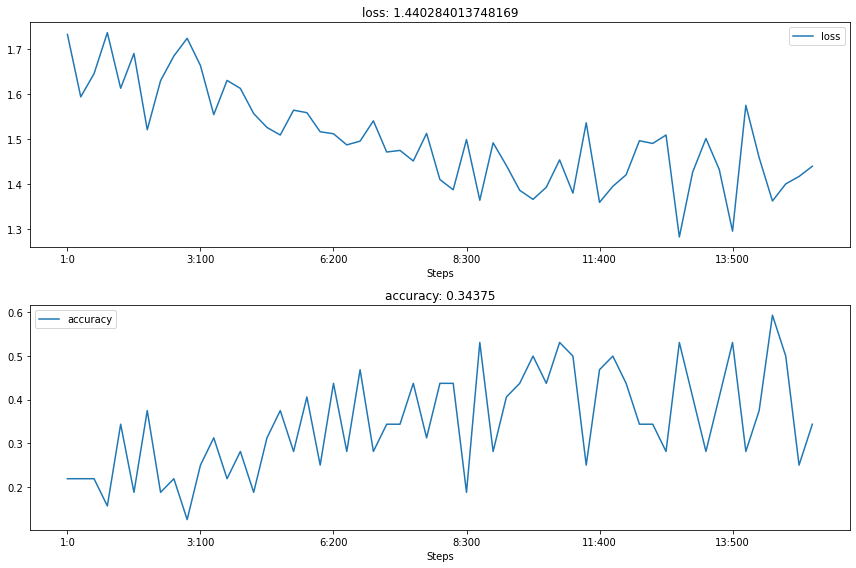

KeyboardInterrupt: ignored

In [125]:
#--- Creamos variables para almacenar los scores en cada época 
from sklearn.metrics import f1_score


model.train()

#--- Definimos nuestro criterio de evaluación y el optimizador 
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, weight_decay=0.1)
criterion = torch.nn.CrossEntropyLoss()


#--- Entrenamos el modelo usando únicamente 20 épocas
n_epochs = 20

history = hl.History()
canvas = hl.Canvas()

iter = 0

for epoch in range(n_epochs):
  for batch_idx, (X_train_batch, Y_train_batch) in enumerate(train_dl):
    # Pasamos os datos a 'cuda'
    
    X_train_batch = X_train_batch
    Y_train_batch = Y_train_batch

    # Realiza una predicción
    Y_pred = model(X_train_batch)
    # Calcula el loss
    loss = criterion(Y_pred, Y_train_batch)

    Y_pred = torch.argmax(Y_pred, 1)

    # Calcula el accuracy
    acc = sum(Y_train_batch == Y_pred)/len(Y_pred)
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if iter%10 == 0:
        #-- Visualizamos la evolución de los score loss y accuracy
        history.log((epoch+1, iter), loss=loss, accuracy=acc)
        with canvas:
          canvas.draw_plot(history["loss"])
          canvas.draw_plot(history["accuracy"])

    iter += 1
    del X_train_batch, Y_train_batch, Y_pred


In [126]:
#-- Validamos el modelo
from sklearn.metrics import f1_score

model.cpu()
model.eval()

Y_pred = model(X_test)
loss = criterion(Y_pred,Y_test)

Y_pred = torch.argmax(Y_pred, 1)
f1 = f1_score(Y_test, Y_pred, average='macro')

acc = sum(Y_test == Y_pred)/len(Y_pred)

print( 'Loss:{:.2f}, F1:{:.2f}, Acc:{:.2f}'.format(loss.item(), f1, acc ) )

Loss:1.51, F1:0.28, Acc:0.33


In [127]:
#--- Guardamos el nuevo Modelo
torch.save(model,open('./ResNet_First.pt','wb'))

In [128]:
from sklearn.metrics import confusion_matrix

def CM(Y_true, Y_pred, classes, lclasses=None):
  fig = plt.figure(figsize=(10, 10))
  cm = confusion_matrix(Y_true, Y_pred)
  if lclasses == None:
    lclasses = np.arange(0,classes)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cmap=plt.cm.Blues
  ax = fig.add_subplot(1,1,1)
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.86)
  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=lclasses, yticklabels=lclasses)
  ax.set_xlabel("Predicted",size=20)
  ax.set_ylabel("True",size=20)
  ax.set_ylim(classes-0.5, -0.5)

  plt.setp(ax.get_xticklabels(), size=12)
  plt.setp(ax.get_yticklabels(), size=12)

  fmt = '.2f'
  thresh = cm.max()/2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=15 , color="white" if cm[i, j] > thresh else "black")

  plt.show()

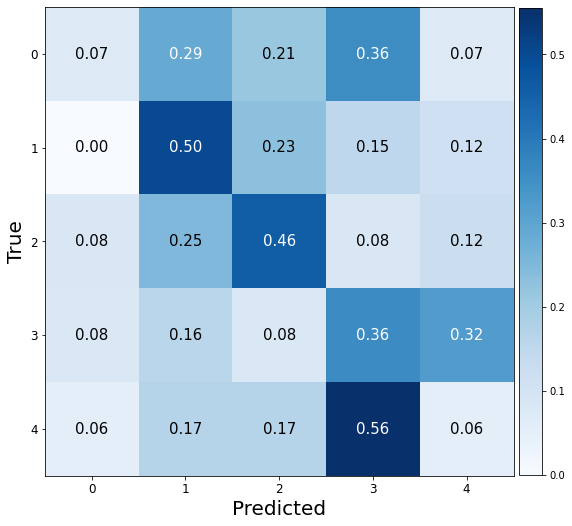

In [129]:
CM(Y_test, Y_pred, 5)

In [ ]:
Y_pred

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])